In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv('D:/supermarket-sales-iitm/supermarket_sales_original.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
data["Branch"].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [10]:
data["Payment"].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [12]:
data["Product line"].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [7]:
data["Date"]

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [1]:
import pandas as pd
from datetime import datetime

def fix_mixed_dates(date_str):
    """
    Handle mixed date formats in the dataset:
    - Try parsing as mm/dd/yyyy first (US format)
    - If that results in month > 3 (impossible for this dataset), try dd-mm-yyyy
    - If still problematic, return NaT (Not a Time) for manual inspection
    """
    try:
        # First try parsing as mm/dd/yyyy
        dt = datetime.strptime(date_str, "%m/%d/%Y")
        if dt.month > 3:  # This would be invalid for Jan-Mar 2019 data
            try:
                # Try parsing as dd-mm-yyyy instead
                dt = datetime.strptime(date_str, "%d-%m-%Y")
            except:
                pass
        return dt
    except:
        try:
            # Try parsing as dd-mm-yyyy
            dt = datetime.strptime(date_str, "%d-%m-%Y")
            return dt
        except:
            # If both fail, return NaT (will need manual inspection)
            return pd.NaT

# Load your dataset
df = pd.read_csv('supermarket_sales_original.csv')  # or pd.read_csv() if CSV file

# Apply the date fixing function to the Date column
df['Date_Fixed'] = df['Date'].astype(str).apply(fix_mixed_dates)

# Create Month_Year column in "Jan-2019" format
df['Month_Year'] = df['Date_Fixed'].dt.strftime('%b-%Y')

# Verify results
print("Sample of fixed dates:")
print(df[['Date', 'Date_Fixed', 'Month_Year']].head())

# Check for any dates that couldn't be parsed
if df['Date_Fixed'].isna().any():
    print("\nWarning: Some dates couldn't be parsed automatically:")
    print(df[df['Date_Fixed'].isna()]['Date'].unique())
    print("These will need manual inspection.")

# Save the cleaned data
df.to_excel('cleaned_sales_data.xlsx', index=False)
print("\nCleaned data saved to 'cleaned_sales_data.xlsx'")

Sample of fixed dates:
        Date Date_Fixed Month_Year
0   1/5/2019 2019-01-05   Jan-2019
1   3/8/2019 2019-03-08   Mar-2019
2   3/3/2019 2019-03-03   Mar-2019
3  1/27/2019 2019-01-27   Jan-2019
4   2/8/2019 2019-02-08   Feb-2019

Cleaned data saved to 'cleaned_sales_data.xlsx'


In [6]:
import pandas as pd

df = pd.read_excel("supermarket_sales_wrkbk.xlsx", sheet_name= "supermarket_sales")  # or .csv
df['Dates'] = pd.to_datetime(df['Dates'])
daily_sales = df.groupby('Dates')['Total'].sum().asfreq('D')


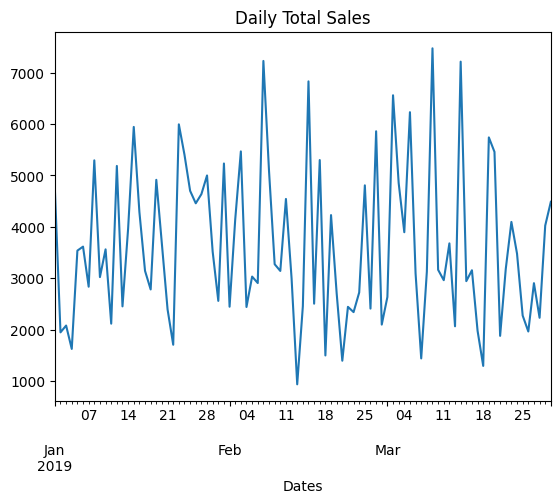

In [7]:
import matplotlib.pyplot as plt
daily_sales.plot(title='Daily Total Sales')
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_sales.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')  # p < 0.05 = stationary

ADF Statistic: -7.654895726803343
p-value: 1.7495640309589597e-11


hence p value < 0.05 so reject null hypothesis (which says data is non-stationary)

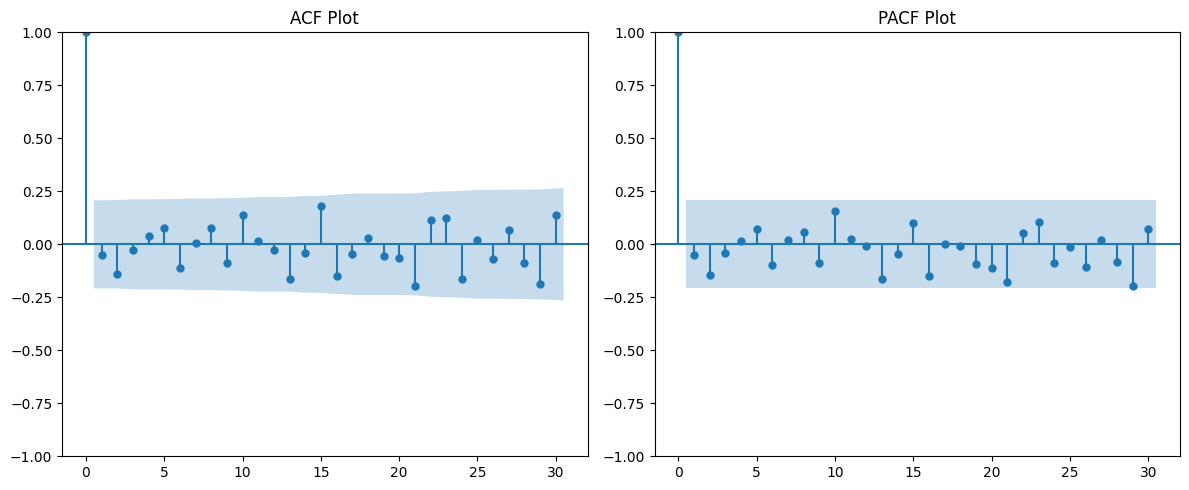

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Drop missing values (if any)
series = daily_sales.dropna()

# Create the plots
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plot_acf(series, lags=30, ax=plt.gca(), title='ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(series, lags=30, ax=plt.gca(), title='PACF Plot')

plt.tight_layout()
plt.show()


- No significant autocorrelation after lag 1; suggests q = 0 or 1
- Same behavior; suggests p = 0 or 1

In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_sales, order=(1,1,0)) #p,d,q
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   89
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -791.597
Date:                Fri, 11 Apr 2025   AIC                           1587.195
Time:                        22:34:53   BIC                           1592.149
Sample:                    01-01-2019   HQIC                          1589.191
                         - 03-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4602      0.106     -4.328      0.000      -0.669      -0.252
sigma2       3.84e+06   5.81e+05      6.606      0.000     2.7e+06    4.98e+06
Ljung-Box (L1) (Q):                   2.74   Jarque-

<Axes: title={'center': 'Next 30 Days Forecast'}>

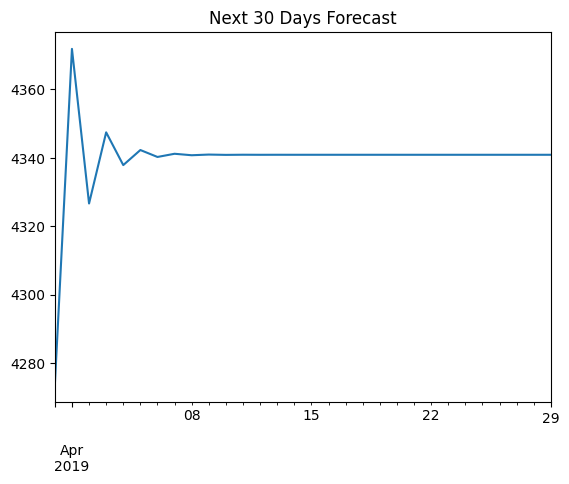

In [23]:
forecast = model_fit.forecast(steps=30)
forecast.plot(title='Next 30 Days Forecast')

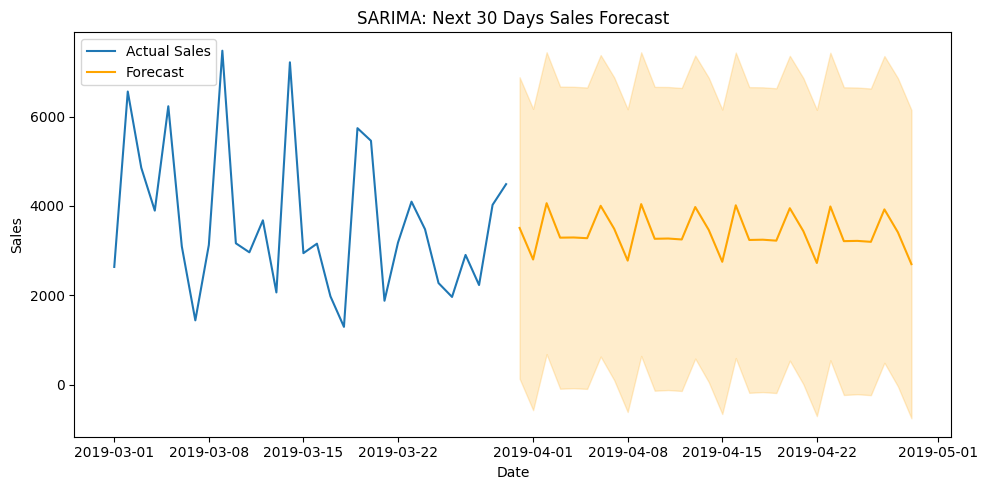

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(daily_sales,
                order=(1, 1, 1),       # non-seasonal p,d,q
                seasonal_order=(1, 1, 1, 7),  # seasonal P,D,Q,s (7 for weekly seasonality)
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_result = model.fit(disp=False)

# Forecast next 30 days
forecast = sarima_result.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_sales[-30:], label='Actual Sales')
plt.plot(forecast_mean, label='Forecast', color='orange')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='orange', alpha=0.2)
plt.title("SARIMA: Next 30 Days Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()
